## Content



- Split for numerical features


- Overfitting/Underfitting
    - Geometric Intuition

- Hyperparameter tuning

- Impact of Outliers

- Standardization

- Encoding of categorical features for DT (with large categories)

- DT for High demensionality data 

- Imbalance in DT

- Runtime complexity

- Multiclass classification 

- Using feature twice for split

- Feature importance


## UseCase Intro: Employee Attrition

#### You are a Data Scientist working at a Jio

The company is facing a huge problem of employee attrition


#### Why is this a problem? 

Employee Attriton has always been a major problem for companies.
- The cost of replacing an employee has always been significant due to the fact that most times:
- The company will have to pay the new employee more than the employee they are replacing
- Lots of time and resources invested in interviewing multiple candidates


#### What's the task at hand? 
Your task is to :
- Identify the likelihood of an active employee leaving the company.

This can help the company take more targeted approaches to retain the specific employees at risk of attrition

- Help identify the key indicators/factors leading to an employee leaving.

This will help the company take more proactive measures in retaining current and future employees to reduce employee dissatisfaction

- Find out the policies or strategies can be adopted based on the results to improve employee retention?


#### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

Preprocessed Data

In [ ]:
!gdown 12G_J8gBel8MpspdXJruZuuMvyrm9upNb
!gdown 1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A


!gdown 1p03Ltdto8XoOdu14YlcQjzE-360SyI89
!gdown 1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx


Downloading...
From: https://drive.google.com/uc?id=12G_J8gBel8MpspdXJruZuuMvyrm9upNb
To: /content/X_test.csv
100% 51.7k/51.7k [00:00<00:00, 56.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-zjfYbZm8JC4wog9tG4zltMPuZM6p9_A
To: /content/X_train.csv
100% 154k/154k [00:00<00:00, 57.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1p03Ltdto8XoOdu14YlcQjzE-360SyI89
To: /content/y_test.csv
100% 743/743 [00:00<00:00, 923kB/s]
Downloading...
From: https://drive.google.com/uc?id=1mNcWfaEW19ql8WCih6HiqRryCcjFUUqx
To: /content/y_train.csv
100% 2.21k/2.21k [00:00<00:00, 4.04MB/s]


In [ ]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({'Target': 1})


In [ ]:
X_sm.shape

(1848, 36)

In [ ]:
X_sm

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,42,1245,12,3,0.238984,1,0,52,3,4,...,8,0.0,0.000000,1.000000,0.000000,0.895096,0.104904,0.000000,0.895096,0.104904
1844,47,827,12,3,0.236800,1,0,66,3,4,...,8,0.0,0.000000,1.000000,0.000000,0.512758,0.487242,0.000000,0.512758,0.487242
1845,29,336,14,1,0.137509,3,0,85,3,2,...,7,0.0,0.913267,0.086733,0.000000,1.000000,0.000000,0.000000,0.086733,0.913267
1846,26,1142,17,2,0.236799,3,1,33,2,1,...,1,0.0,0.000000,1.000000,0.000000,0.512576,0.487424,0.512576,0.487424,0.000000


# **Splitting numerical features**



If we have categorical features we can simply split basing on features, 
- but for numerical features, there are no categories.

#### How do we do the splitting for numerical features?



<img src='https://drive.google.com/uc?id=1KnWSO5NlyG5HIOaUITYIyf4sQk_OAw-0'>


let us consider a numerical feature $f_1$ of $n$ values and categorical feature $f_2$

Typically, we will have threshold and 
- We compare the each value of $f_1$ with a threshold 
- and split them basing on the threshold.


#### But, how do we choose the threshold?

- First we arrange $f_1$ in increasing order and 
    - set each value of $f_1$ as threshold
    - Next, we calculate the IG of that split. 
    - Which gives us n IG values say IG$_1^1$, IG$_2^1$, IG$_3^1$ ..... IG$_n^1$ (for feature 1)

- Now, we compare 
    - $n$ Information Gain values of numerical feature and IG values of categorical feature (IG$_1^2$)
    - Amongst all of these, we choose the split has maximum Information Gain (IG).


<img src='https://drive.google.com/uc?id=149zkQMS_cNc_PVrvShQHUPWlX5kPXKd1'>


<img src='https://drive.google.com/uc?id=10-a4b97a0dLnP3V416rRJD_eGXv8trEm'>


#### Question: What if two features are giving equal IG?

Ans:  we can pick any one and do the splitting.

#### (Optional) Optimizing feature split for numerical feature

Computing IG for every feature is not very computationally efficient. so, 
- algorithms follow set of rules to bin it carefuuly.
- The purpose of binning is to make it more computationally efficient.
- There are some techniques to do binning but the simplest binning method is to use Quantiles (Q1,Q2,Q3,Q4)

<img src='https://drive.google.com/uc?id=1gEqCxZWlf7nMZLPre0rEO52ZmmcwdKEv'>


# **Overfit Vs Underfit**

### Question : When do you think we will overfit a decision tree model?

We can say that the model is overfit when we go on splitting, which increases the Depth of the tree.

**Depth** is the distance from the root node to the farthest leaf.

In simple terms we can say that , as the depth increses we overfit more and more






<img src='https://drive.google.com/uc?id=1J71DJWj-ROTjF7HO8iaXmVSTSvWQUKs9'>




## **Why does DT overfit as depth increases?** 

Imagine we have 1000 datapoints,
- As the depth increases, the data set becomes smaller.

Suppose by the time we reach the leaf node, we got a pure node but only 5 datapoints.

As you go deeper, there will be fewer points

- there may be chance these points (@ leaf node) are noise or outliers

This results in Overfit.

**Key lesson** : Too much depth is bad

<img src='https://drive.google.com/uc?id=1nlGGvUplV-nqDCnB13U2GVx3FN9fSTZ4'>


## **What if the depth is too low? (Underfit)**

Consider same example with 1000 datapoints at root node.

Now, we usually grow a tree until we get pure node.

Here, we are stopping the tree growth at depth =2
- i.e. we are **pruning** the tree
- In other words, we are cutting the  tree


Suppose at one leaf node, we got
- 500 +ve points
- 200 -ve points

Now, at test time we got a query point $x_q$ which ended up at same leaf now.

**What class do we classify the query point ?** Positive class










<img src='https://drive.google.com/uc?id=1BhkvlILlmWzuwWQoxIff4y7TT954Rh3v'>



## **What if the depth is 0? (Extreme case)**

Depth = 0 means
- we only have single node

Suppose the datapoint distribution is
- 55% +ve class
- 45% -ve class

For every query point $x_q$, we will say it is positive clss

This results in **Underfitting**



<img src='https://drive.google.com/uc?id=1cB0ksNzTt8rXQFQoL4kfPnUXNOWWWdMi'>

## **Decision Stump**

There are few other terminology related to decision tree

* A **Decision Stump** is a Decision Tree with depth 1.

- **Shallow tree** : A tree with small depth
- **Deep tree**: Tree where depth is large



<img src='https://drive.google.com/uc?id=1ZAlYbClUnSZIm4p-B-tgT5BPUwzWwo0d'>

# **Geometrical Interpretation**



### **Low Depth**

Lets assume we have 2 features $f_1,f_2$
* Geometrically every split is a axis parallel hyper-plane which divides your data space

* In case of a **shallow tree**, the depth is less 
    - which means the splits are less 
    - which there by infer that the **number of hyper-planes deviding the data space are less** i.e less chances of overfitting 


<img src='https://drive.google.com/uc?id=12_9IScV4HNiq4WdO8Ungdxfded4jvMOM'>

### **High depth**

#### What happes when the depth is high?

When the depth is high, we are breaking the  data space into many small divisions.
* These small spaces may have very few data points
- those might also be outliers or noise.
* Hence the higher chances of overfitting.


<img src='https://drive.google.com/uc?id=1u6QT5zyH5KilyYom5Opp8UwCzDe59aEd'>

# **Tradeoff** 

So, here **depth is the control**

Now, to control depth, there are multiple ways
- Split only if atleast $m$ data points are there.
    - For example: split only if there are atleast 20 datapoints in node.
- Split only if IG is greater than some threshold value $x$

Ideally, we want the leaf nodes to have pure node.
- But if we increase the depth in order to achieve depth
    - it'll end up overfitting to noise or outliers







<img src='https://drive.google.com/uc?id=1JM4eEyDozaewgQ_JUN-ueUxK5pkEMjzS'>


The idea here is
- we treat **depth** as **hyperparameter**


We try multiple values of depth.
- We train model using various depth values
- Check the cv error 
- pick the depth which gives us the lowest cv error




<img src='https://drive.google.com/uc?id=15_fyrfmYjUOkYSu99xv_kwkNuz7e2v7C'>


### Visualizing Decision Tree

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X_sm.columns)
#Ensure the target variable 'Attrition' is not there in the feature list

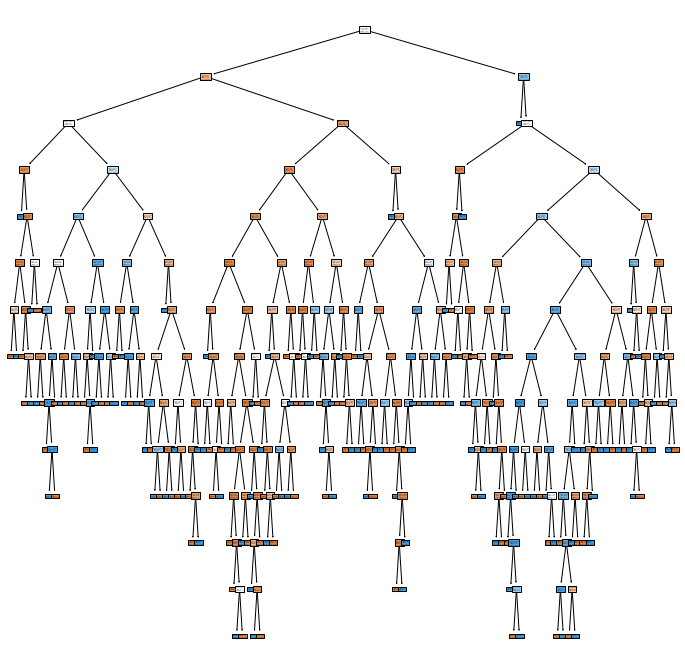

In [ ]:
tree_clf = tree_clf.fit(X_sm, y_sm)

plt.figure(figsize=(12,12))
plot_tree(tree_clf, filled=True);

Notice the depth of the model. 

#### What can we infer from this visualisation ?
If you zoom into the above image and look into all the leaf nodes, you will see that all are homogeneously split.

This shows that the model has learnt all the noise as well and hence overfitting



# **Hyperparameters**

Let's look at various hyperparmeter that we can use from sklearn library



<img src='https://drive.google.com/uc?id=1z8KTHw3qq0wonrM-zxnSD_Tunh477zLv'>



* **Criterion = gini**, states that make splits basing on gini impurity
* **Splitter = best**, states that 
    - make the split basing on the best computed value insteaD of random values
    - these random values are used in Extremely Randomised Trees (will learn later).


* **max_depth** used set maximium depth upto which a tree will grow
    - By default, it is **None** meaning it'll grow until all leaves are pure.

* **min_samples_split** is used to set the minimum number of data points required to split further.
    - helps us to control depth which therefore prevents **overfit**.
    - By default, it is 2

* **min_samples_leaf** helps us to set the minimum number of samples which a leaf node can have 







* **max_leaf_nodes** helps us to set the maximum number of leaf nodes that a tree can have. 
    - If we keep a limit on number of leaf nodes
        - means we are indirectly controlling the depth


* **max_features** is used to set the features to be considered while deciding the best split.
    - By default, it considers all the features for split
    - In case we have too many features
        - and we want to make it computationally efficient,
        - we can try **max_features =sqrt/log2**
        - it'll try out random subset of features

<img src='https://drive.google.com/uc?id=1mddwaljVp4_V7fKzYDCpPEo7IRaL3Ju8'>


### Code for DT - Hyperparameter tuning

In [ ]:
depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth = depth)

    cv_acc_results = cross_validate(tree_clf, X_sm, y_sm, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.07846974883203 Validation: 71.38249118683902
K-Fold for depth: 3 Accuracy Std: Train: 0.4642241748449559 Validation: 7.256654003605825
***************
K-Fold for depth:4 Accuracy Mean: Train: 81.92646297816736 Validation: 76.79318448883666
K-Fold for depth: 4 Accuracy Std: Train: 1.0045119361734336 Validation: 6.00125792126415
***************
K-Fold for depth:5 Accuracy Mean: Train: 85.52800777094221 Validation: 78.6301410105758
K-Fold for depth: 5 Accuracy Std: Train: 1.036654883302406 Validation: 4.553803112914131
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 82.8586956521739
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 9.466893026447542
***************
K-Fold for depth:9 Accuracy Mean: Train: 97.48074248924556 Validation: 84.42538190364279
K-Fold for depth: 9 Accuracy Std: Train: 0.6194207855061746 Validation: 7.902336655110872
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.260405343

#### Training with best params

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth = 4)
tree_clf=tree_clf.fit(X_sm, y_sm)
pred = tree_clf.predict(X_test)

#### Visualizing DT

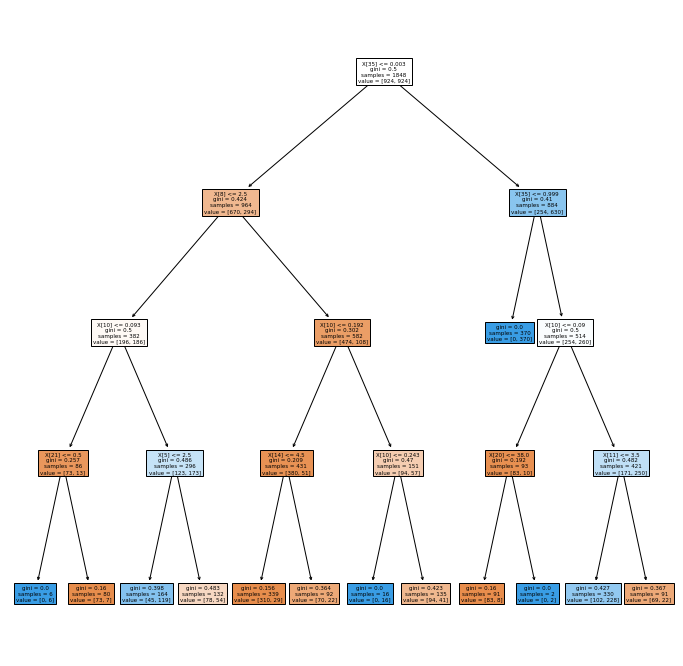

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(tree_clf, filled=True);

Notice how the tree is pruned now i.e. depth has reduced

What can we infer from this visualisation ?
- The tree is now much shorter in depth
- The leaf nodes are more generalised as well
- This is what the hyperparameter tuning helped achieve

#### **Confusion Matrix**

Let's also plot the confusion matrix for test data

Recall the TP,TN,FN,FP we discussed in performance metric lecture



Text(0.5, 15.0, 'Predicted label')

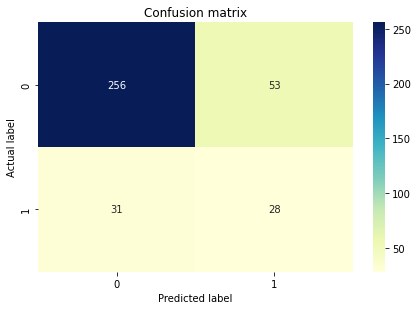

In [ ]:
## Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, tree_clf.predict(X_test))
# class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Notice that 
- model is classifying class 0 quite well
- However, the number of FN is large.

# **Impact of outliers**


#### Question: Will outliers impact the DT ?

Outliers impact a decision tree when the depth is high i.e. overfitted model 

Imagine a scenario where
- we have 1000 datapoints at root node
- we built a tree
- After splitting agressively i.e. depth is high we got
    - 5 +ve point in one leaf nodes

There may be chance these 5 points are noise / outliers. 

Hence, outliers will only impact tree with large depth

<img src='https://drive.google.com/uc?id=1nlGGvUplV-nqDCnB13U2GVx3FN9fSTZ4'>


## **Standardization**

#### (Revision question) Did we standardize data for Linear Regression & PCA?

Yes.

#### Question: Is Standardisation  required for Decision tree?

Imagine we have a numerical feature $f_i$
- values are say, 2.1, 2.6, 2.8 and so on ..

Let's say we standardized it
- values we go -1.2, -1, 0 , .. and so on

For calculating entropy, we are using the values as threshold only as splitting criteria.

Entropy isn't dependent on value
- it depends on number of +ve/ -ve datapoints
- and in turn dependend on thresold

Threshold order won't change with standardization.

Standardization does not impact entropy and Information gain

<br>

**Key lesson**:

Though standardisation is required in optimisation based problems like Linear Regression, Logistic Regression, PCA, 
- as standardisation **doesn't effect the entropy or the Information Gain** of the data it doesn't add any value in Decision tree.




<img src='https://drive.google.com/uc?id=1TKSiPMLUt14FHs1AjAqySZQycgyhwWs0'>

# **Encoding of categorial features for DT**

Imagine we have a categorical feature with many categories  (for example: zipcode with 10,000 values)


#### Question: How can we encode  a categorical feature with many categories ?  

* We can do **"no encoding"**
 * if we did not do encoding
    - we'll get 10,000 child nodes
    - data set becomes too small in some nodes
    - prediction may suffer as we don't have enough datapoints (can be outliers or noise) in node to affirmly back our prediction
    - not a wise choice

* We can do **target encoding** 
 * covert to numerical and then give it to decision tree

* We **should not do one hot encoding**
  * Because that increases the dimensionality of the data 

**Key lesson:**
* Appropriate feature encoding depends on the model that you are using like if you are using logistic regression you can use one hat encoding but not in decision tree.




<img src='https://drive.google.com/uc?id=1gtSEg36jCNkhdaAYOPuctlWEqJEH7l2j'>

# **DT for high dimension data**

### Question: Why should we avoid DT for high dimensional data? 


If there are lots of features it takes a lot of time to check every possible split and compute entropy

Hence, time to build DT shoots up 

**So, what can be done about that.?**
* We can use distributed computing or multi-processing
 * **Distributed Computing** is a process in which the data is split and worked on different cores.
* We avoid using Decision trees as when the dimensionality is high a simple linear seperator can be used, by using logistic regression
* Either use Random forest or GBDT




<img src='https://drive.google.com/uc?id=1UcqJB8hfzbXaxnU4zwIygyshwoY1T46R'>


# **Imbalance data in DT**

#### Question: Will imbalance data impact DT? 



Recall that Entropy and Gini Impurity are fucntions of probability

* Assume  a condition where there is an imbalance in the root node 
  * **having 99% positive data **
  * **This skews the entropy or Gini Impurity**

So, we have to rebalance the data. (which is what we did in the beginning)

* We can rebalance in many ways like 
 * using class weights
 * up - samplinig
 * SMOTE can be used.  



<img src='https://drive.google.com/uc?id=1HKUqza2v3zHmYP3-zYRKWD_Mi5MUs8PX'>

# **Train/Run time complexity**

#### Question: What do you think will be run time and space complexity will be ? 

Let 
- n be the number of data points 
- m be the number of nodes and 
- d be the depth of the tree 

Then, 
* **Train time complexity** is **$O(nlog(n)*d)$**
    - where nlog(n) is the time taken to sort numerical features
    - multiplied by d, as you have to calculate split for d features

* The **Run Time complexity** of the tree of depth d is O(depth) 
    - as we only have to evaluate at max d condtions

* The **Space complexity** of the tree is O(m)
    - we only have to store **m if else condtions**

Here,  depth is the function of number of nodes i.e log(m)   
 
If $d_{best}$ is computated using cross validation the decision tree will be very efficient at runtime.




<img src='https://drive.google.com/uc?id=1lgpPR9T2IxGxWsmUH9D8hO-5NTQtJFqE'>

# **Multi class classification**

#### How will DT work for multi class classification?

Whether it is binary or multiclass, DT works the same.

We just need to calculate the Entropy or Gini Impurity.

However, there is a catch
* at the leaf node if we have more classes we take the majority class.



<img src='https://drive.google.com/uc?id=1dDWifTRTzncApzTa-M6ExppyCJj5m6-Q'>


# **Interpretibility**

Decision Trees are hyper interpretable
- as we can read them as if else condition
- can be understood by non expert


<img src='https://drive.google.com/uc?id=1S8XxE09aiBO_RK_Bte8jKIGjr81An7Ef'>



## **Using feature twice for split**

#### Question: Can we use a feature twice for splitting?



Imagine we split the root node using feature $f_1$ 

**Can we use this feature again to split the child node ?**


<img src='https://drive.google.com/uc?id=1Ve7CZ5Pb8Tufhb98AhmEg5L9rVHgm1-z'>



Let's see for both categorical as well as numerical features

Let's say we have 
- 100 +ve points
- 100 -ve points at root node.

### **Categorical feature**

We used Gender (categorical) to split the data

We got two child nodes
- Male node:
    - 70 +ve
    - 30 -ve

- Female node:
    - 30 +ve
    - 70 -ve

**Can we again use Gender to split Male node?**

No. 
Even if we use, we only have Male category data in current node.
- there will be no information gain i.e. info gain = 0







<img src='https://drive.google.com/uc?id=1g_zrbs47bI4XqaQ4lJulVnal-B2mzfhn'>



But, there's an exception
- A single categorical feature can be used more than once in different branches of tree


<img src='https://drive.google.com/uc?id=16L9ZMNk4hz9eMrafNrPxcL4w-zLfNGrt'>



### **Numerical feature**

Now, let's say we are splitting the root node numerical feature i.e. Years of Experience.

First, we found out IG for each threshold and YOE of 12 yrs was giving the best IG.
- We split the node with $YOE ≤ 12$

#### Question: Can we again use numerical feature for split?

Yes. It is possible that same feature for different threshold may give best IG among all features at child node.




<img src='https://drive.google.com/uc?id=10CQM-YGajNRnSIMlPTvUvosTnCoXFEcb'>



# **Feature Importance**

Recall,
* In case of logistic and linear regression after standardisation we can just consider absolute value of weights which give us feature importance 

But we don't have any weights in DT.

#### **Question: How can we get Feature importance for DT ? Any ideas?**

Suppose we have 10,000 datapoints @ root node.

Let us consider a feature $f_i$ which is used twice in splitting a decision tree 

* At first split let the number of data points be 5000($n_1$) and Infromation Gain is IG$_1$
* Let number of data points at second split be 500($n_2$) and Infromation Gain is IG$_2$

* We calculate feature importaance of $f_i$ by 
 - $f_i$ = IG$_1$ * $\frac{n_1}{n}$ + IG$_2$ * $\frac{n_2}{n}$ 
 * i.e $f_i$ = IG$_1$ * $\frac{5000}{10,000}$ + IG$_2$ * $\frac{500}{10,000}$ 

This is called **normalized information gain.**

* Closer to the root node, more the weightage
    - it gives more weightage based on number of datapoints it is impacting.




<img src='https://drive.google.com/uc?id=12gJv36lGDumsuJ0bdafTB1Iq8bPpbs68'>


We calculate normalized information gain for all features and 
- this Normalized IG is used as feature importances.


Do note that this is one of the popular way of calulating Feature importance.

Different libraries may use different way of calculating Feature importance i.e. implementation specific.





<img src='https://drive.google.com/uc?id=1_89mxH7bzeSeuR90uQjSwU-jPlSGkeqV'>


### Code walkthrough

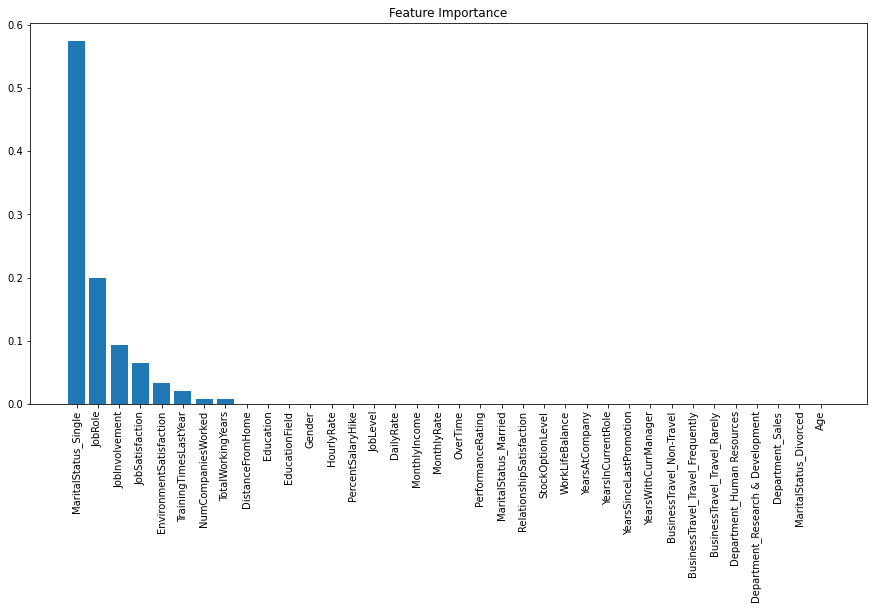

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(X_sm.columns))):
    feat = X_sm.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.574666
1,JobRole,0.200052
2,JobInvolvement,0.093164
3,JobSatisfaction,0.064014
4,EnvironmentSatisfaction,0.032594
5,TrainingTimesLastYear,0.020674
6,NumCompaniesWorked,0.007593
7,TotalWorkingYears,0.007242
8,Department_Human Resources,0.000000
9,BusinessTravel_Travel_Rarely,0.000000


#### What can we infer from this data ?
- StockOptionLevel affects attrition the most
- So the company can focus on providing more stocks to employees
- Then comes factors such as Job_Satisfaction and JobRole.